# Kapitel 08 - 02

> ### <span style="color:red">ACHTUNG:</span> Bitte zum Starten im Menü `Cell->Run All` ausführen.

## Deaktivieren der Warnungen

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import tensorflow as tf

In [3]:
print(tf.__version__)

2.1.0


## Code Listings - Kapitel 8 Teil 02

#### Listing 8.14

In [1]:
import tensorflow.keras as tf

from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image

#### Listing 8.15

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os

#### Listing 8.16

In [3]:
model = InceptionV3(weights='imagenet')
model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

#### Listing 8.17

In [4]:
path = 'eingabebilder/'
file = 'schaeferhund.jpg'
img_file = os.path.join(path,file)

img = image.load_img(img_file, target_size=(299, 299))

x = image.img_to_array(img)
print(x.shape)
print(x)

(299, 299, 3)
[[[219. 224. 228.]
  [212. 217. 221.]
  [213. 218. 222.]
  ...
  [202. 202. 200.]
  [197. 199. 194.]
  [191. 196. 189.]]

 [[219. 224. 228.]
  [221. 226. 230.]
  [223. 228. 232.]
  ...
  [196. 196. 194.]
  [189. 191. 186.]
  [189. 194. 187.]]

 [[212. 213. 218.]
  [217. 222. 226.]
  [217. 227. 229.]
  ...
  [193. 194. 189.]
  [199. 201. 196.]
  [192. 197. 191.]]

 ...

 [[ 54.  85.  41.]
  [ 52.  91.  38.]
  [ 52.  90.  41.]
  ...
  [ 60.  81.  50.]
  [ 69.  96.  65.]
  [ 45.  66.  25.]]

 [[ 42.  76.  26.]
  [ 36.  73.  32.]
  [ 49.  85.  39.]
  ...
  [ 60.  86.  38.]
  [ 56.  79.  35.]
  [ 62.  88.  49.]]

 [[ 42.  71.  25.]
  [ 24.  50.  15.]
  [ 57.  83.  36.]
  ...
  [ 58.  74.  35.]
  [ 40.  53.  23.]
  [ 32.  56.  24.]]]


#### Listing 8.18

In [5]:
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
print(x.shape)
print(x)


(1, 299, 299, 3)
[[[[ 0.7176471   0.75686276  0.7882353 ]
   [ 0.6627451   0.7019608   0.73333335]
   [ 0.67058825  0.70980394  0.7411765 ]
   ...
   [ 0.58431375  0.58431375  0.5686275 ]
   [ 0.54509807  0.56078434  0.52156866]
   [ 0.49803925  0.5372549   0.48235297]]

  [[ 0.7176471   0.75686276  0.7882353 ]
   [ 0.73333335  0.77254903  0.8039216 ]
   [ 0.7490196   0.7882353   0.81960785]
   ...
   [ 0.5372549   0.5372549   0.52156866]
   [ 0.48235297  0.49803925  0.45882356]
   [ 0.48235297  0.52156866  0.4666667 ]]

  [[ 0.6627451   0.67058825  0.70980394]
   [ 0.7019608   0.7411765   0.77254903]
   [ 0.7019608   0.78039217  0.79607844]
   ...
   [ 0.5137255   0.52156866  0.48235297]
   [ 0.56078434  0.5764706   0.5372549 ]
   [ 0.5058824   0.54509807  0.49803925]]

  ...

  [[-0.5764706  -0.3333333  -0.6784314 ]
   [-0.5921569  -0.2862745  -0.7019608 ]
   [-0.5921569  -0.29411763 -0.6784314 ]
   ...
   [-0.5294118  -0.36470586 -0.60784316]
   [-0.4588235  -0.24705881 -0.49019605]

#### Listing 8.19

In [6]:
prediction = model.predict(x)

decoded = decode_predictions(prediction, top=3)[0]
print(decoded)


[('n02106662', 'German_shepherd', 0.92125314), ('n02105162', 'malinois', 0.02156584), ('n02105412', 'kelpie', 0.0059969528)]


#### Listing 8.20

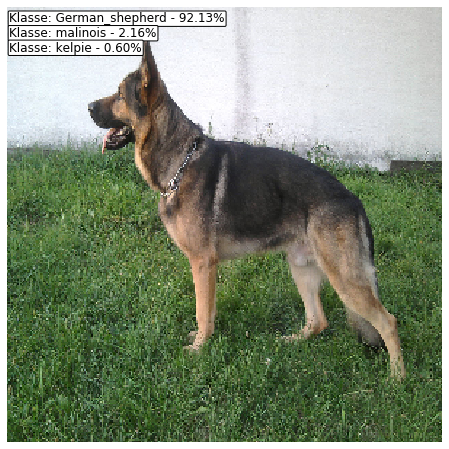

In [7]:
plt.figure(figsize=(8, 8))
plt.axis('off')

pos_x, pos_y = 1,10
for id, lab, prob in decoded:
    plt.text(pos_x, pos_y, 'Klasse: {} - {:.2f}%'.format(lab,prob*100),
            fontsize=12, color='black',
            bbox=dict(boxstyle="round", pad=0.1, fc='white'))
    pos_y += 10

plt.imshow(img)